# Supervised/Unsupervised Learning


# Implementing classifiers - Understanding Decision Boundaries

In this section we will compute the decision boundary for different supervised machine learning models. Through the models we will compute the decision boundaries in different ways, some better than others, but ultimately trying to provide a better understanding of the topic and give as many options as possible to get the same result.

The first step is to import few libraries and read our data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/01-boundaries.csv')

In [ ]:
df

,x1,x2,y
0,0.336494,-0.985951,0.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,0.0
...,...,...,...
95,-1.457533,-1.306791,0.0
96,1.635614,0.273943,0.0
97,0.113120,0.020465,1.0
98,0.753405,0.193830,1.0


Let's plot the data in a graph and check the binary distribution.

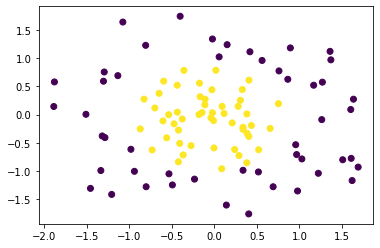

In [ ]:
plt.scatter(df.x1,df.x2, c=df.y)
plt.show()

Now, we extract the arrays for the data points and their respective labels.

In [ ]:
x1 = np.array(df['x1'],ndmin = 2)
x2 = np.array(df['x2'], ndmin = 2)

In [ ]:
X = np.concatenate((x1,x2), axis=0)
X = np.transpose(X)

In [ ]:
y = np.array(df['y'], ndmin = 1)

In [ ]:
X.shape

(100, 2)

## Logistic regression


For the logistic regression we'll try to extract the decision boundary by extracting the parameters that define the boundary between classes and look that intersection.

In [ ]:
from sklearn.linear_model import LogisticRegression


First we create our model, fit the values in our data, and compute the score given by the model.

In [ ]:
lr = LogisticRegression(random_state=1, solver='lbfgs',multi_class='ovr').fit(X, y)

In [ ]:
pred_lr = lr.predict(X)
pred_lr.shape

(100,)

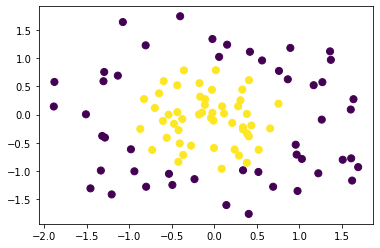

In [ ]:
plt.figure(1)
plt.scatter(df.x1, df.x2, c=df.y, s=50)
plt.scatter(df.x1, df.x2, c=pred_lr,marker='v')
plt.show()

In [ ]:
lr.score(X,y)

0.6

The model didn't performed as good as we would like to, with only 0.6. Here we extract the parameters for the line that divides both classes.

In [ ]:
params_lr = np.array(( lr.intercept_[0], lr.coef_[0,0],lr.coef_[0,1]))

In [ ]:
a = np.arange(-2,2,0.01)
b = a.copy()
error = 0.0001

In [ ]:
preboundary = np.array((-params_lr[1]*a, -params_lr[2]*b))

In [ ]:
boundary = np.array([[0,0]])
for i in range(len(a)):
  for j in range(len(b)):
    if (abs(preboundary[0,i] + preboundary[1,j]-params_lr[0]) < error) and (abs(preboundary[0,i] + preboundary[1,j]-params_lr[0]) > -error):
      boundary = np.append(boundary, [[a[i],b[j]]], axis=0)
    else:
      continue

KeyboardInterrupt: ignored

In [ ]:
boundary.shape

Finally we plot the boundary obtained by the algorithm. The real values are the circles, the predicted ones are the triangles, and the line is the boundary decision.

In [ ]:
plt.figure(1)
plt.scatter(boundary[:,0], boundary[:,1], s=20)
plt.scatter(df.x1, df.x2, c=df.y, s=50)
plt.scatter(df.x1, df.x2, c=pred_lr,marker='v')
plt.show()

## Decision Tree

For the decision tree we did something different to obtain the boundary. Because this model basically divides the space of decision with lines, we looked for the thresholds that create the decision boundary.

In [ ]:
from sklearn import tree
import graphviz


In [ ]:
dt = tree.DecisionTreeClassifier().fit(X, y)

In [ ]:
pred_dt = dt.predict(X)


In [ ]:
dt.score(X, y)

1.0

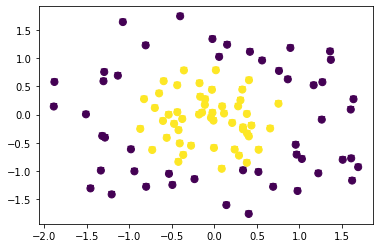

In [ ]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.y, s=50)
plt.scatter(df.x1, df.x2, c=pred_dt,marker='v')
plt.show()

In the following cell we just obtain the tree as a diagram.

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("boundary")

'boundary.pdf'

Let's extract the features and their thresholds.

In [ ]:
print(dt.tree_.feature)
print(dt.tree_.threshold)

[ 0  0 -2  1 -2  1 -2 -2 -2]
[ 0.75636408 -0.90641543 -2.         -0.97239891 -2.          0.87394863
 -2.         -2.         -2.        ]


Here we obtain the thresholds that we care (different from -2).

In [ ]:
t_x1 = np.array([0])
t_x2 = np.array([0])
for i,j in enumerate(dt.tree_.threshold):
  if dt.tree_.feature[i] == 0:
    t_x1 = np.append(t_x1,[j])
  elif dt.tree_.feature[i] == 1:
    t_x2 = np.append(t_x2,[j])

t_x1 = np.delete(t_x1, 0)
t_x2 = np.delete(t_x2, 0)


Finally, we plot those threshold as line in the same space as the real and predicted values.

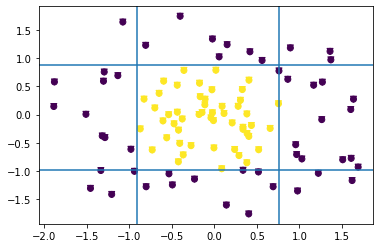

In [ ]:
plt.figure()
for i in t_x1:
  plt.axvline(i,-2,2)
for i in t_x2:
  plt.axhline(i,-2,2)
plt.scatter(df.x1, df.x2, c=df.y)
plt.scatter(df.x1, df.x2, c=pred_dt,marker='v')
plt.show()

## Support vector machine


### Linear SVM

For the linear support vector machine we just extract the parameters that describe the decision boundary and plot thos values.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel="linear").fit(X,y)


In [ ]:
pred_svm = svm.predict(X)

In [ ]:
svm.score(X,y)

0.7

As we coould see, this model does not performe that well. This is mainly because the linearity the model represents.

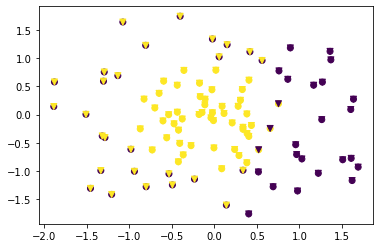

In [ ]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.y)
plt.scatter(df.x1, df.x2, c=pred_svm,marker='v')
plt.show()

In [ ]:
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (svm.intercept_[0]) / w[1]

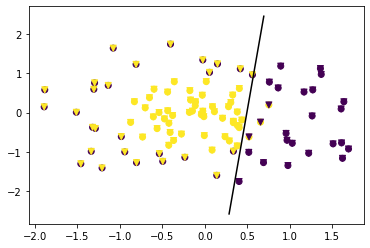

In [ ]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.y)
plt.plot(xx[28:34], yy[28:34],'k-')
plt.scatter(df.x1, df.x2, c=pred_svm,marker='v')
plt.show()

### RBF SVM

For this SVM model we got a much better result. To plot the decision boundary we create a "meshgrid" of the space and use the same model to predict wich class would belong any given point.

In [ ]:
svm = SVC(kernel="rbf", probability=True).fit(X,y)


In [ ]:
pred_svm = svm.predict(X)

In [ ]:
svm.score(X,y)

1.0

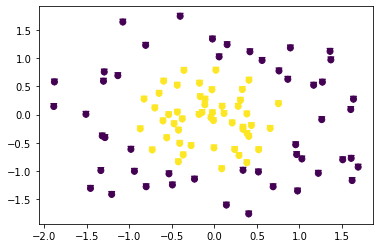

In [ ]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.y)
plt.scatter(df.x1, df.x2, c=pred_svm,marker='v')
plt.show()

Here we start by creating the x and y array to extract the mesh, and then make the predicionts over the mesh.

In [ ]:
xx = np.linspace(-2, 2, 101)
yy = np.linspace(-2, 2, 101)
# full coordinate arrays
#xx, yy = np.meshgrid(x, y,indexing='ij')

In [ ]:
mesh = np.zeros((101,101))
xx1, yy1 = np.meshgrid(xx, yy, indexing='ij')

In [ ]:
yy1.shape

(101, 101)

In [ ]:
svm.predict([[k,l]])

array([0.])

In [ ]:
for i,k in enumerate(xx):
  for j,l in enumerate(yy):
    mesh[i,j] = svm.predict([[k,l]])

In [ ]:
y.shape

(100,)

Plotting the results we can see how the prediction over the meshgrid gives us the division between classes.

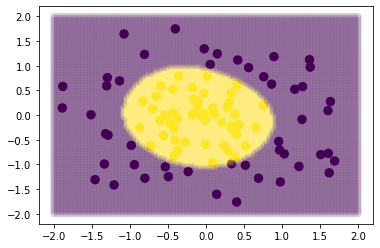

In [ ]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.y, s=70)
plt.scatter(df.x1, df.x2, c=pred_svm,marker='v')
plt.scatter(xx1,yy1,c=mesh,alpha=0.1)
plt.show()

## Neural Networks

For the Neural Network we followed the same method used for the rbf svm. We create a meshgrid and obtain the predictions for that space.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn = MLPClassifier(random_state=0).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
pred_nn = nn.predict(X)

In [ ]:
nn.score(X,y)

0.99

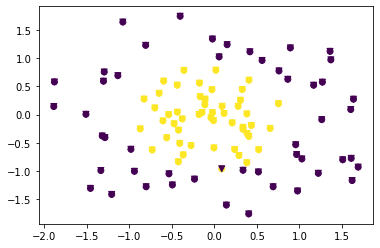

In [ ]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.y)
plt.scatter(df.x1, df.x2, c=pred_nn,marker='v')
plt.show()

In [ ]:
xx = np.linspace(-2, 2, 101)
yy = np.linspace(-2, 2, 101)

In [ ]:
mesh = np.zeros((101,101))
xx1, yy1 = np.meshgrid(xx, yy, indexing='ij')

In [ ]:
for i,k in enumerate(xx):
  for j,l in enumerate(yy):
    mesh[i,j] = nn.predict([[k,l]])

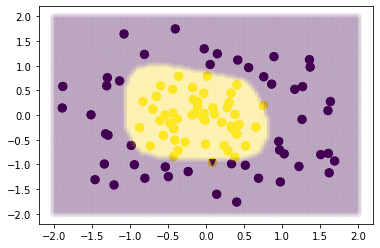

In [ ]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.y, s=70)
plt.scatter(df.x1, df.x2, c=pred_nn,marker='v')
plt.scatter(xx1,yy1,c=mesh, alpha=0.05)
plt.show()

### What are the shapes of the decision boundaries of different classifiers? Do all of them have the same shape? If not, why are the shapes of the decision boundaries different?

So we can see that the decission boundaries are different in most of the models. Logistic regression and Linear SVM have lines as boundaries. RBF SVM and the Neural Network models have a more presice shape, being basically a figure that encloses on the classes. And Decision Trees, we could say that have different lines that divide the space based on the threshold obtained by the model. All ot hos shapes depend primarily in the model and the type of model that is used.

For instance, Linear SVM machine basically try to find a line that creates the biggest margin between the classes, but it just can be a line. Now, the Neural Network can be much more flexible due to all of its tunable parameters, making these models create almost any shape we can image.

# How a clustering algorithm works

For this section we will create two kmeans models, one from sklearn and the ohter one from scratch. The first step is to obtain the data from the csv file, but in this particula case looks like we have a complicate document; what we are going to do is to extract the different data points from the 3 clusters in the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/01-mouse.csv',  on_bad_lines='skip')

In [ ]:
df = pd.read_csv('/content/01-mouse.csv',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 11: expected 1 fields, saw 2\nSkipping line 312: expected 1 fields, saw 2\nSkipping line 313: expected 1 fields, saw 2\nSkipping line 424: expected 1 fields, saw 2\nSkipping line 425: expected 1 fields, saw 2\n'


In [ ]:
df.iloc[415:430]

,########################################################
415,## Clipping: [0.00000000 0.00000000] - [1.0000...
416,## Density correction factor: 1.0
417,## Generators:
418,## Discards: 7 Retries left: 1000
419,## Density correction factor estimation: 0.742...
420,##############################################...
421,0.8377997370239522 0.7538358880610266 Ear_right
422,0.7294538573365863 0.779583670283009 Ear_right
423,0.6806521891032632 0.7177689348083449 Ear_right
424,0.7638809829937171 0.6572282090651652 Ear_right


In [ ]:
new_df = df[11:]

In [ ]:
values = np.zeros((290,2))
values.shape

(290, 2)

In [ ]:
for i in range(290):
  aux = np.array([new_df.iloc[i][0].split()[0:2]])
  values[i] = aux

In [ ]:
values2 = np.zeros((100,2))


In [ ]:
for i in range(100):
  aux = np.array([df.iloc[i+311][0].split()[0:2]])
  values2[i] = aux

In [ ]:
values3 = np.zeros((100,2))


In [ ]:
for i in range(100):
  aux = np.array([df.iloc[i+421][0].split()[0:2]])
  values3[i] = aux

In [ ]:
mouse = np.concatenate((values, values2, values3))

In [ ]:
mouse.shape

(490, 2)

Once that we have the data points we can plot thos and see their distribution.

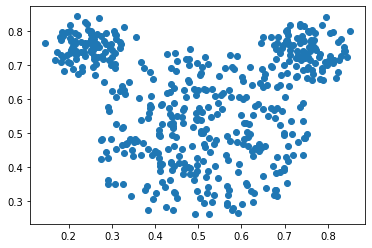

In [ ]:
plt.figure()
plt.scatter(mouse[:,0],mouse[:,1])

## K-means from sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(3).fit(mouse)

In [ ]:
pred_km = km.predict(mouse)

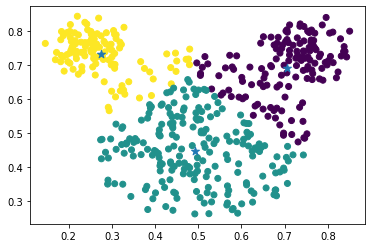

In [ ]:
plt.figure()
plt.scatter(mouse[:,0],mouse[:,1],c=pred_km)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='*', s=70)
plt.show()

## K-Means from scratch

We begin by creatin two important functoin, the euclidean distance function for two points and the random intial centroids.

In [ ]:
def distance(x1,x2):
  d1 = x2[0]-x1[0]
  d2 = x2[1]-x1[1]
  d = np.sqrt(d1**2 + d2**2)
  return d

In [ ]:
from random import random

In [ ]:
def initial_clusters(k, points):
  max_x = np.max(points[:,0])
  min_x = np.min(points[:,0])
  max_y = np.max(points[:,1])
  min_y = np.min(points[:,1])
  centroids = np.zeros((3,2))
  for i in range(3):
    centroids[i,0] = min_x + (max_x-min_x) * random()
    centroids[i,1] = min_y + (max_y-min_y) * random()

  return centroids

Now that we have those two function we create to iterations, one for the epochs and the other one to obtain the distances and obtain the classes for each point. The first for will also compute the average of the distances to compute at the end the new centroid.

In [ ]:
epochs = 100
k = 3
d = np.ones((len(mouse), k))
point_class = np.zeros((len(mouse)))

centroids = initial_clusters(k, mouse)
new_centroids = centroids.copy()
count0 = 0
count1 = 0
count2 = 0

for i in range(epochs):
  for j,point in enumerate(mouse):
    #print(point)
    d[j,0] = distance(centroids[0,:], point)
    d[j,1] = distance(centroids[1,:], point)
    d[j,2] = distance(centroids[2,:], point)
    point_class[j] = np.argmin(d[j,:])
    #print(np.argmin(d[j,:]))
    new_centroids[int(point_class[j]),0] += point[0]
    new_centroids[int(point_class[j]),1] += point[1]
    if point_class[j] == 0:
      count0 += 1
    elif point_class[j] == 1:
      count1 += 1
    else:
      count2 += 1

  new_centroids[0,:] /= count0
  new_centroids[1,:] /= count1
  new_centroids[2,:] /= count2
  centroids = new_centroids.copy()
  count0 = 0
  count1 = 0
  count2 = 0


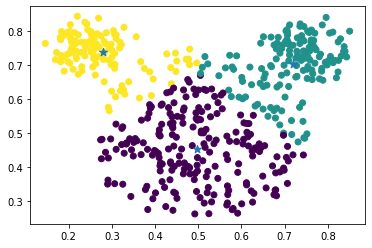

In [ ]:
plt.figure()
plt.scatter(mouse[:,0],mouse[:,1],c=point_class)
plt.scatter(centroids[:,0],centroids[:,1],marker='*', s=70)
plt.show()

Finally let's see how different both results are. The '*' markers are from the model made from scratch and the 'o'  markers are from the sklearn library.

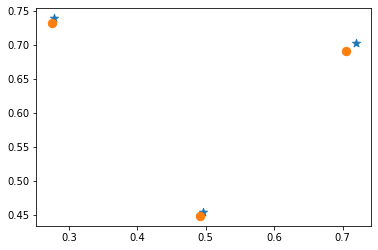

In [ ]:
plt.figure()
plt.scatter(centroids[:,0],centroids[:,1],marker='*', s=70)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='o', s=70)
plt.show()